**Goal:** 
1) Load all the newick trees and find the height of the trees
2) Add the extra information like height, number of tips and is_ultametric to the dataframe
3) Plot a histogram of the height of the trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import dendropy
from tqdm import tqdm

plt.style.use('dark_background')

In [2]:
def load_trees(tree_path:Path):
    """Function to load the trees:
    Input: The tree path 
    Output: Tree object"""
    return dendropy.Tree.get(path=str(tree_path),schema="newick")

In [3]:
def compute_height(tree:dendropy.Tree):
    tree.calc_node_root_distances()
    tip_distance=[leaf.root_distance for leaf in tree.leaf_node_iter()]
    height=float(max(tip_distance) if tip_distance else 0.0)
    n_tips=len(tip_distance)
    is_ultrametric=bool(np.allclose(tip_distance, tip_distance[0])) if tip_distance else True
    return height,is_ultrametric



In [14]:
def main():
    base_path=Path.cwd().parent
    file_path=base_path/"output"/"metadata.csv"
    trees_df=pd.read_csv(file_path)

    height=[]
    is_ultametric=[]


    for file_id in tqdm(trees_df["file_id"].to_list()):
        tree_path=base_path/"output"/"data"/f"{int(file_id)}.nwk"
        tree=load_trees(tree_path)
        h,u=compute_height(tree)
        height.append(h)
        is_ultametric.append(u)

    trees_df["height"]=height
    trees_df["is_ultrametric"]=is_ultametric

    output_csv=base_path/"output"/"preprocessed_parameters.csv"
    trees_df.to_csv(output_csv,index=False)
    print(f"Saved to: {output_csv}")

    sns.histplot(trees_df,x=height,kde=True)

    

100%|██████████| 5000/5000 [01:57<00:00, 42.61it/s]


Saved to: c:\Users\khadk\OneDrive\Desktop\phylogenetics\output\preprocessed_parameters.csv


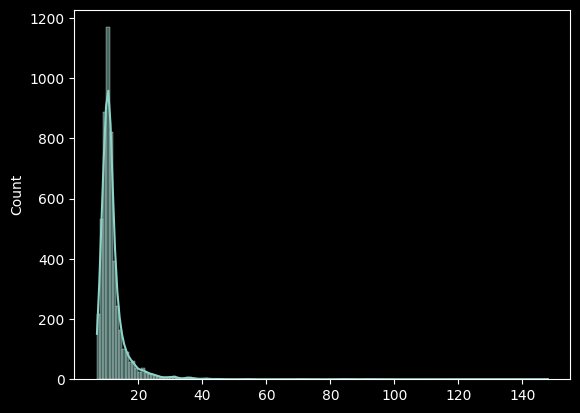

In [15]:
if __name__== "__main__":
    main()

In [ ]:
base_path=Path.cwd().parent
file_path=base_path/"output"/"preprocessed_parameters.csv"

df=pd.read_csv(file_path)
df.shape

(5000, 11)

In [ ]:
df["height"].describe().T

count    5000.000000
mean        9.083270
std         5.069625
min         3.428914
25%         6.892611
50%         8.101430
75%         9.704565
max       137.640670
Name: height, dtype: float64

In [ ]:
df["t1"].describe().T

count    5000.000000
mean        6.281410
std         1.117145
min         4.003660
25%         5.383415
50%         6.387387
75%         7.254692
max         7.998435
Name: t1, dtype: float64

In [ ]:
df[df["height"]<10]

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,num_leaves_after_t1,num_leaves_before_t1,height,is_ultrametric
1,6,5.408794,0.396355,0.413940,0.905547,3.557958,172,9,163,8.539124,False
2,3,7.090530,0.980519,0.500107,0.764412,2.324149,856,396,460,7.387347,False
3,7,7.179408,0.592200,0.063483,0.759864,3.017225,537,60,477,9.089900,False
4,5,7.573486,0.937731,0.197977,0.651462,3.328259,623,276,347,7.300179,False
6,9,4.346449,0.953928,0.486750,0.300476,3.349399,355,25,330,5.776067,False
...,...,...,...,...,...,...,...,...,...,...,...
4993,4990,4.239831,0.307562,0.111499,0.958185,4.255307,254,27,227,6.732875,False
4994,4996,4.600306,0.444541,0.325274,0.950752,2.700725,336,19,317,8.500148,False
4995,4998,6.642604,0.379648,0.311239,0.323719,4.193331,191,13,178,8.446198,False
4996,4999,6.873832,0.718492,0.808080,0.840514,2.753850,438,40,398,9.128855,False


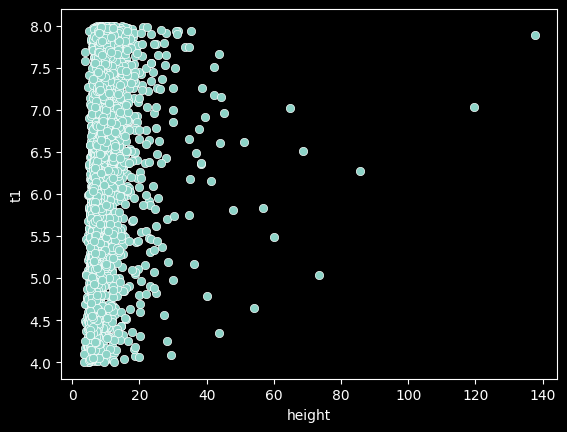

In [ ]:
sns.scatterplot(df,x='height',y='t1')
plt.show()

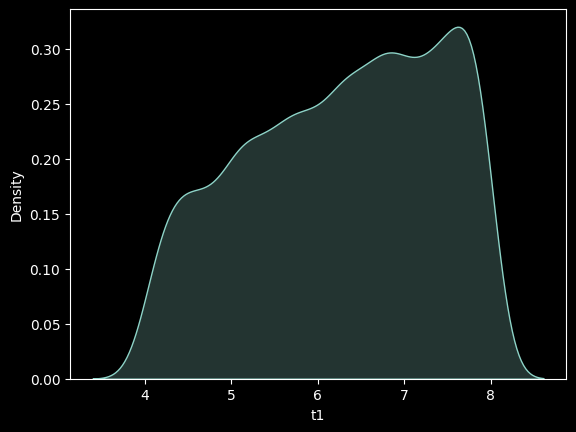

In [ ]:
sns.kdeplot(df,x="t1",fill=True)
plt.show()

In [ ]:
df[df["height"]>100]

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,num_leaves_after_t1,num_leaves_before_t1,height,is_ultrametric
770,766,7.038397,0.014982,0.198435,0.331283,2.888536,128,7,121,119.628947,False
3871,3840,7.892979,0.022876,0.555049,0.910187,2.458163,215,13,202,137.640670,False
